In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
#The Target class is heavily skewed
print('Genuine Transactions',round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the Dataset')
print('Fraud Transactions',round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the Dataset')

Genuine Transactions 99.83 % of the Dataset
Fraud Transactions 0.17 % of the Dataset


In [6]:
df['Class'].sum()

492

We have only 492 cases of fradulent transactions , so we will select 2000 cases of normal transactions 

In [7]:
non_fraud = df[df['Class'] == 0].sample(2000)
fraud     = df[df['Class'] == 1]

df_new = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)

In [8]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,139858.0,1.861175,-0.196093,-1.718364,0.516902,0.002949,-1.197700,0.253282,-0.314920,0.998417,...,-0.200493,-0.499176,0.088497,-0.216076,-0.070591,-0.091551,-0.022227,-0.006956,97.88,0
1,76837.0,-1.532738,1.381636,1.972383,-1.627542,0.028538,-0.842331,1.331494,-0.806416,1.551211,...,-0.359956,0.020908,-0.060045,0.619002,-0.345443,0.612304,0.011339,-0.410334,7.68,0
2,139117.0,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,8.30,1
3,25062.0,-0.463508,1.498102,0.456426,2.471774,0.362104,0.062675,0.759546,0.315830,-0.788907,...,0.213923,0.661081,0.289715,0.183955,-1.033734,-0.112255,0.058563,0.164557,76.06,0
4,70868.0,1.089538,-0.105651,-0.357904,0.110293,0.506532,0.453403,0.218449,0.061355,-0.347782,...,-0.445665,-1.543620,0.025208,-1.325685,0.128802,0.059110,-0.055958,0.008031,102.90,0


In [9]:
X = df_new.drop(['Class'],axis=1).values
y = df_new['Class'].values

In [11]:
X.shape,y.shape

((2492, 30), (2492,))

Let us visualize the fraudelent and normal transactions

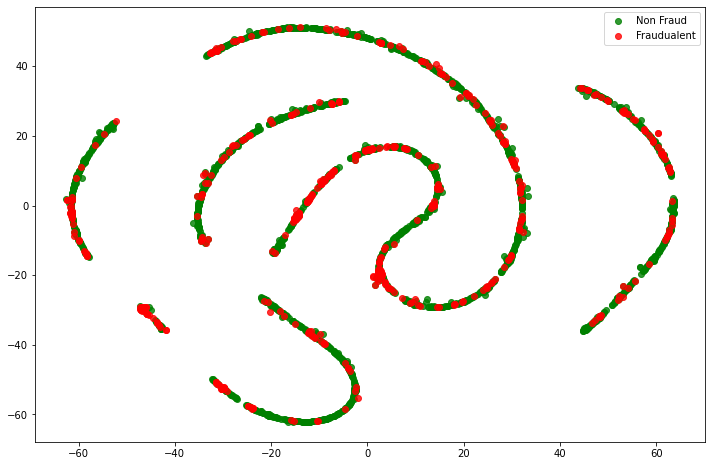

In [18]:
def tsne_plot(X1,y1,name='graph.png'):
    tsne = TSNE(n_components=2,random_state=42)
    X_t = tsne.fit_transform(X1)
    
    plt.figure(figsize=(12,8))
    plt.scatter(X_t[np.where(y1==0),0],X_t[np.where(y1==0),1],marker='o',color='g',alpha=0.8,label='Non Fraud')
    plt.scatter(X_t[np.where(y1==1),0],X_t[np.where(y1==1),1],marker='o',color='r',alpha=0.8,label='Fraudualent')
    
    plt.legend(loc = 'best')
    plt.savefig(name)
    plt.show()
    

tsne_plot(X,y,'Original.png')
    
    

Thus it can be seen that both type of transactions are well intermixed and currently cannot be separated easily

### Autoencoders
We will create an autoencoder model and train it with the normal(non fraud) transactions only.
The model will learn to best represent the normall transactions and thus when fradulent transactions are feed to it the representaion will be different and so the fraud transactions can be easily distinguished from the non fraud ones.

In [23]:
# Input layer
input_layer = Input(shape=X.shape[1])

#encoding part
encoder = Dense(100,activation='tanh',activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(50,activation='relu')(encoder)

#decoding part
decoder = Dense(50,activation='tanh')(encoder)
decoder = Dense(100,activation='tanh')(decoder)

#Output layer
output_layer = Dense(X.shape[1],activation='relu')(decoder) 

In [24]:
autoencoder = Model(input_layer,output_layer)
autoencoder.compile(optimizer='adam',loss='mse')

In [26]:
#Since the data is a result of PCA transformation, some features are as it is, thus we will scale the inputs
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1993, 30), (499, 30), (1993,), (499,))

In [30]:
minmax = MinMaxScaler()

In [31]:
minmax.fit(X_train)

MinMaxScaler()

In [32]:
X_train = minmax.transform(X_train)

In [33]:
X_test = minmax.transform(X_test)

In [36]:
X_norm, X_fraud = X_train[y_train==0], X_train[y_train==1]

In [37]:
X_norm.shape

(1600, 30)

We will train the autoencoder using only the normal transactions from the training dataset ie X_norm

In [49]:
autoencoder.fit(X_norm,X_norm,batch_size=32,epochs=10,shuffle=True,validation_split=0.2)

Epoch 1/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0858 - val_loss: 0.0855
Epoch 2/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0857 - val_loss: 0.0855
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0857 - val_loss: 0.0855
Epoch 4/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0857 - val_loss: 0.0855
Epoch 5/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0857 - val_loss: 0.0855
Epoch 6/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0857 - val_loss: 0.0855
Epoch 7/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0855 - val_loss: 0.0762
Epoch 8/10
40/40 [==============================] - 0s 1ms/step - loss: 0.0673 - val_loss: 0.0632
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0626 - val_loss: 0.0624
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0622 - val_loss: 0.0622


Now the model is trained we can get the latent representation of the input.

In [50]:
autoencoder.layers[0:3]

In [51]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [52]:
norm_hid_rep = hidden_representation.predict(X_norm)
fraud_hid_rep = hidden_representation.predict(X_fraud)

In [53]:
rep_x = np.append(norm_hid_rep,fraud_hid_rep,axis=0)
y_n   = np.zeros(norm_hid_rep.shape[0])
y_f   = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n,y_f)

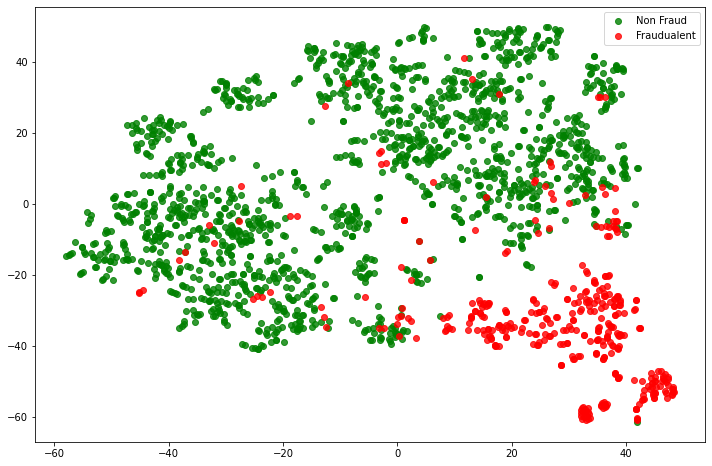

In [54]:
tsne_plot(rep_x,rep_y,'Latent_representation.png')

In [56]:
Xtest_hid_rep = hidden_representation.predict(X_test)

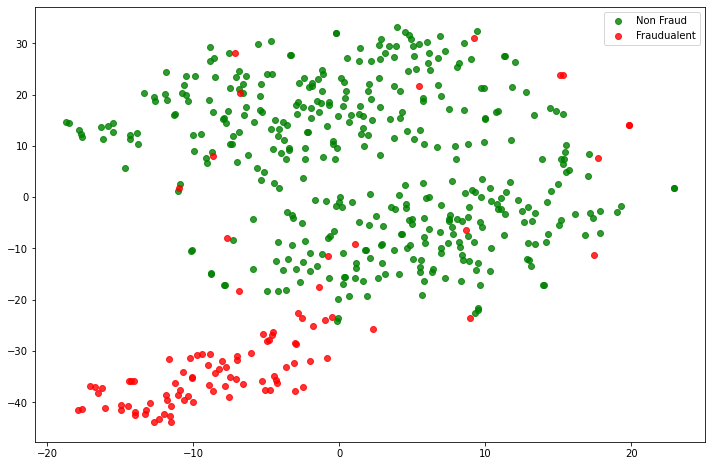

In [57]:
tsne_plot(Xtest_hid_rep,y_test,'Test_representation.png')

Now we train a Logictic Regression using this representations 

In [58]:
clf = LogisticRegression(solver='lbfgs').fit(rep_x,rep_y)

In [60]:
clf_pred = clf.predict(Xtest_hid_rep)

In [61]:
print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       400
           1       0.99      0.80      0.88        99

    accuracy                           0.96       499
   macro avg       0.97      0.90      0.93       499
weighted avg       0.96      0.96      0.96       499



In [62]:
print(confusion_matrix(y_test,clf_pred))

[[399   1]
 [ 20  79]]


It can be observed that by using much less data and in much less time a better model has been created using Autoencoder than the XGBoost or random forest.
The Autoencoder can be made more deep and the number of neurons can also be increased to increase the accuracy of the model.